<a href="https://colab.research.google.com/github/chaitanyasatyasai/credit-score/blob/main/creditscore_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/estadistical.csv")
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Receive/ Not receive credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [10]:
x = df.drop("Receive/ Not receive credit ",axis=1)
y = df["Receive/ Not receive credit "]

In [11]:
cat_cols=[col for col in x.columns if x[col].dtype == 'object']

In [12]:
from sklearn import preprocessing

In [13]:
le=preprocessing.LabelEncoder()
x[cat_cols] = x[cat_cols].apply(lambda col: le.fit_transform(col))

# Splitting

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.3,stratify=y)

In [16]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [18]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [22]:
ypred_log_reg = log_reg.predict(xtest)

In [23]:
accuracy_log_reg = accuracy_score(ytest, ypred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 0.78


In [24]:
print("\nClassification Report for Logistic Regression:\n", classification_report(ytest, ypred_log_reg))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       0.81      0.90      0.85       210
           2       0.68      0.51      0.58        90

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.72       300
weighted avg       0.77      0.78      0.77       300



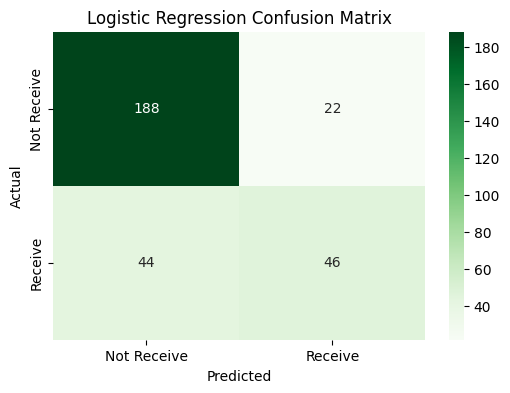

In [34]:
cm_log_reg = confusion_matrix(ytest, ypred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Receive', 'Receive'], yticklabels=['Not Receive', 'Receive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [26]:
ypred_rf = rf.predict(xtest)
accuracy_rf = accuracy_score(ytest, ypred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.76


In [27]:
print("\nClassification Report for Random Forest:\n", classification_report(ytest, ypred_rf))



Classification Report for Random Forest:
               precision    recall  f1-score   support

           1       0.78      0.92      0.84       210
           2       0.68      0.38      0.49        90

    accuracy                           0.76       300
   macro avg       0.73      0.65      0.66       300
weighted avg       0.75      0.76      0.74       300



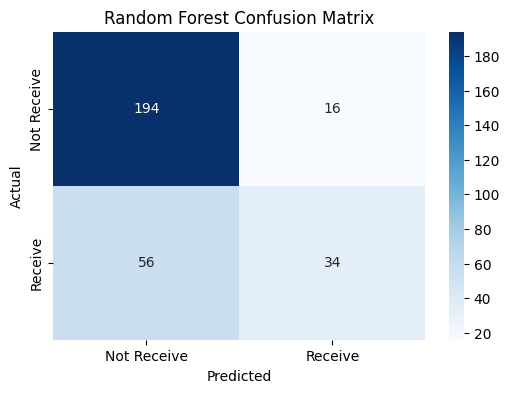

In [28]:

cm_rf = confusion_matrix(ytest, ypred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Receive', 'Receive'], yticklabels=['Not Receive', 'Receive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [30]:
ypred_gb = gb.predict(xtest)
accuracy_gb = accuracy_score(ytest, ypred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

Gradient Boosting Accuracy: 0.80


In [31]:
print("\nClassification Report for Gradient Boosting:\n", classification_report(ytest, ypred_gb))


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86       210
           2       0.71      0.54      0.62        90

    accuracy                           0.80       300
   macro avg       0.77      0.72      0.74       300
weighted avg       0.79      0.80      0.79       300



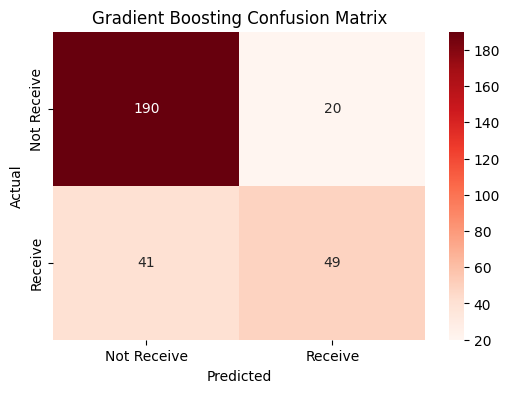

In [33]:
cm_gb = confusion_matrix(ytest, ypred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Receive', 'Receive'], yticklabels=['Not Receive', 'Receive'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
